In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

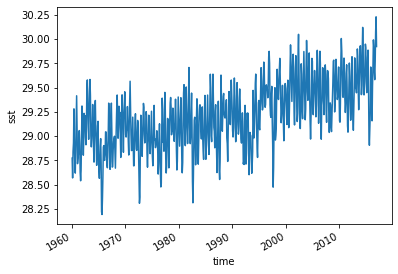

In [3]:
time=ds['time'][:]
lat=ds['lat'][:]
lon=ds['lon'][:]
SST=ds['sst'][:,:,:]
region=SST.sel(time=slice('1960','2016')).sel(lat=[4.0,2.0,0.0,-2.0,-4.0]).sel(lon=np.arange(120.0,170.0,2))
regionmean=np.mean(region,axis=(1,2))
regionmean.plot()
plt.show()

In [4]:
climatology  = regionmean.groupby('time.month').mean()
group_data = regionmean.groupby('time.month')
ds_anom = group_data - group_data.mean(dim='time')
ds_anom

<xarray.DataArray 'sst' (time: 684)>
array([-0.32850075, -0.4036045 , -0.2536354 , -0.42262077, -0.22261047,
       -0.42524338, -0.31703377, -0.29428482, -0.16667366, -0.20231056,
       -0.0978756 , -0.31738663, -0.38575554, -0.2025547 , -0.28200912,
       -0.38638115, -0.44615364, -0.3929367 , -0.40870094, -0.3733654 ,
       -0.4153099 , -0.3302784 , -0.20301628, -0.15799332, -0.00478172,
       -0.16918564, -0.13504028, -0.11876106, -0.34575272, -0.0895195 ,
       -0.04500008, -0.00276947,  0.02703857,  0.18131447,  0.0650959 ,
       -0.02943039,  0.02510071, -0.00588799,  0.12941551,  0.10990143,
        0.08013916,  0.11842537, -0.03321266, -0.02418137, -0.09239388,
       -0.20051765, -0.18787956, -0.20083809, -0.2205143 , -0.24048615,
       -0.11806297, -0.05878639, -0.13608742, -0.23201942, -0.12744331,
       -0.21432686, -0.1641674 , -0.20375824, -0.3609066 , -0.5666332 ,
       -0.46287537, -0.40761566, -0.38824463, -0.452713  , -0.5290203 ,
       -0.5753784 , -0.81570435, -0.72065353, -0.7014351 , -0.7227154 ,
       -0.6265106 , -0.48414612, -0.34438133, -0.22288513, -0.2933483 ,
       -0.30857277, -0.46066284, -0.44679642, -0.3214531 , -0.23928642,
       -0.17837524, -0.27318382, -0.17358017, -0.17923737, -0.31850815,
       -0.31510353, -0.35607147, -0.14775848, -0.16363716, -0.23525429,
       -0.35435486, -0.22726822, -0.2068882 , -0.36605263, -0.53242683,
       -0.38773537, -0.27158737, -0.3027916 , -0.20902824, -0.2524414 ,
...
        0.23679924,  0.2580204 ,  0.39595222,  0.47208023,  0.2759514 ,
        0.25436783,  0.2530117 ,  0.28755188,  0.3916855 ,  0.42794418,
        0.46327972,  0.345541  ,  0.2390747 ,  0.19842911,  0.04542351,
        0.05472374,  0.17017746,  0.23885918,  0.42118835,  0.50182915,
        0.57691765,  0.6050854 ,  0.4986229 ,  0.33530998,  0.2786312 ,
        0.2904625 ,  0.25621986,  0.27398872,  0.27072334,  0.23744011,
        0.29460716,  0.23111153,  0.19180107,  0.07033157,  0.12727928,
        0.15660477,  0.17449188,  0.23910141,  0.22789383,  0.2879219 ,
        0.190979  ,  0.18386841,  0.3210411 ,  0.31417847,  0.06094551,
        0.18296432,  0.14675331,  0.22101021,  0.20406532,  0.291996  ,
        0.33064842,  0.39535522,  0.51861763,  0.34973717,  0.32330894,
        0.39421844,  0.52041626,  0.44974518,  0.3583889 ,  0.46513748,
        0.41002274,  0.41110802,  0.54388237,  0.56941414,  0.45392036,
        0.42396545,  0.53181267,  0.61642265,  0.6154499 ,  0.40002632,
        0.5107975 ,  0.47997856,  0.4111004 ,  0.43380165,  0.52197075,
        0.456913  ,  0.47446823,  0.38729858,  0.45524597,  0.38244057,
        0.2569294 ,  0.01004028, -0.00751114,  0.03794098, -0.05874825,
        0.19824791,  0.21706581,  0.31216812,  0.18443489,  0.41386032,
        0.35664368,  0.48750877,  0.61794853,  0.63100624,  0.6676655 ,
        0.7088661 ,  0.76343536,  0.71486855,  0.5361538 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

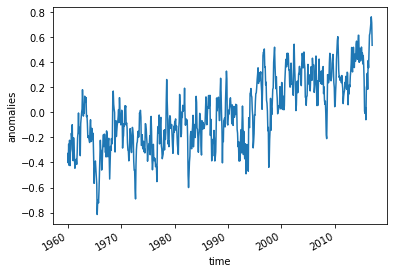

In [5]:
ds_anom.plot()
plt.ylabel("anomalies")
plt.show()

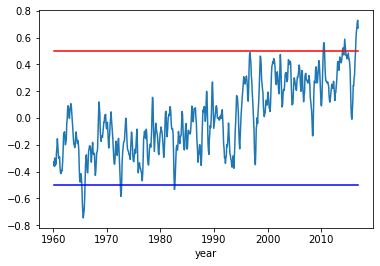

In [6]:
ctime=time.sel(time=slice('1960','2016'))
xtime=ctime.isel(time=np.arange(1,57*12-1)).values

nstep=int(57*12-2)
index=np.zeros(nstep)
ul=np.zeros(nstep)
dl=np.zeros(nstep)
for i in range(0,nstep):
    index[i]=np.mean(ds_anom[i:i+3])
    ul[i]=0.5
    dl[i]=-0.5

plt.xlabel('year')
plt.plot(xtime,index)
plt.plot(xtime,ul,'r')
plt.plot(xtime,dl,'b')
plt.show()